In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
btc = pd.read_csv("BTC-EUR.csv", index_col="Date", parse_dates=True)
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


In [3]:
doge = pd.read_csv("DOGE-EUR.csv", index_col="Date", parse_dates=True)
doge.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,0.000982,0.001078,0.000978,0.001030,0.001030,1912956
2017-11-12,0.001019,0.001037,0.000859,0.000890,0.000890,2820720
2017-11-13,0.000897,0.001039,0.000875,0.001038,0.001038,2127471
2017-11-14,0.001030,0.001062,0.000963,0.001005,0.001005,2256629
2017-11-15,0.001009,0.001141,0.001000,0.001136,0.001136,2410609


In [4]:
btc_doge = pd.merge(btc, doge, on="Date", how="inner", suffixes=("_btc", "_doge"))
btc_doge.head()

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_doge,High_doge,Low_doge,Close_doge,Adj Close_doge,Volume_doge
Date,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,0.000982,0.001078,0.000978,0.001030,0.001030,1912956
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,0.001019,0.001037,0.000859,0.000890,0.000890,2820720
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,0.000897,0.001039,0.000875,0.001038,0.001038,2127471
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,0.001030,0.001062,0.000963,0.001005,0.001005,2256629
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,0.001009,0.001141,0.001000,0.001136,0.001136,2410609


In [5]:
btc_doge[["Close_btc", "Close_doge"]].corr()

,Close_btc,Close_doge
Close_btc,1.000000,0.797558
Close_doge,0.797558,1.000000


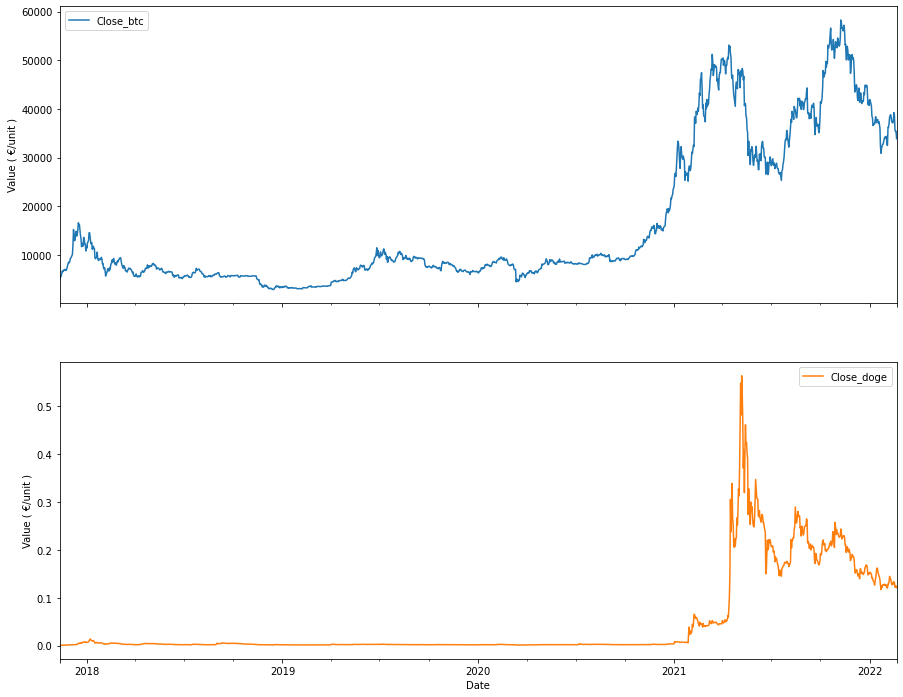

In [6]:
btc_doge[["Close_btc", "Close_doge"]].plot(subplots=True, figsize=(15, 12),ylabel="Value ( €/unit )", legend=True)
plt.show()

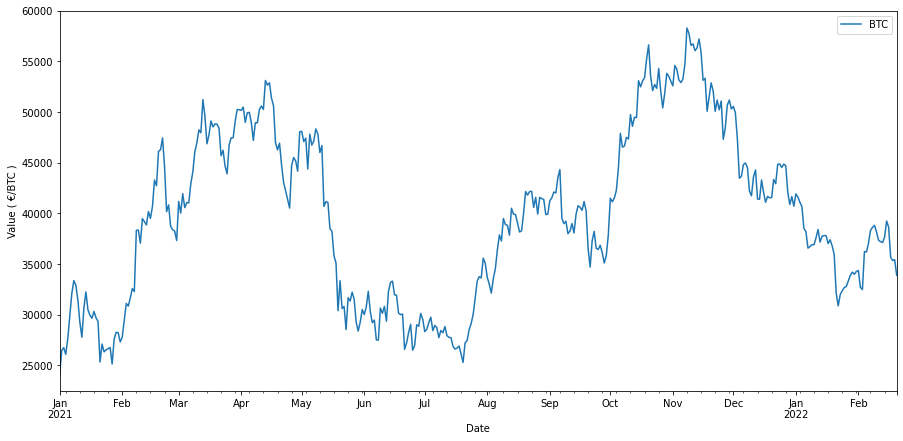

In [7]:
btc.loc["2021":"2022", "Close"].plot(label="BTC", figsize=(15, 7), ylabel="Value ( €/BTC )", legend=True)
plt.show()

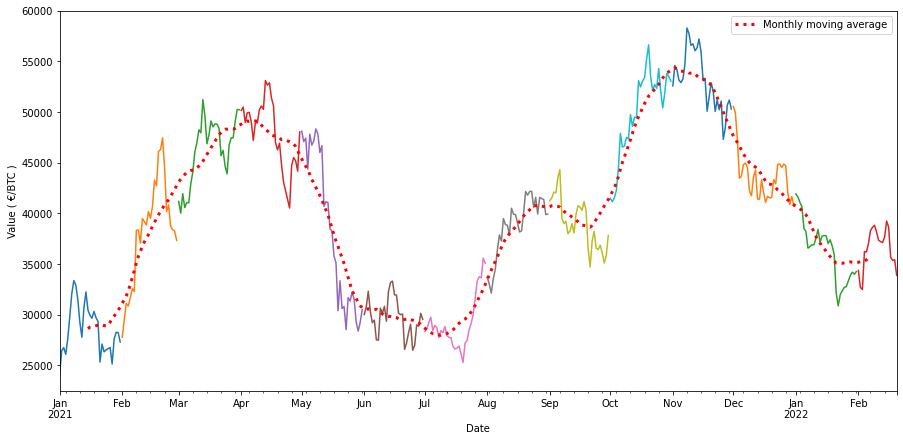

In [8]:
monthly_btc = btc.loc["2021":"2022", "Close"].resample('M')

monthly_btc.plot(figsize=(15, 7), ylabel="Value ( €/BTC )")
rolling_mean = btc.loc["2021":"2022", "Close"].rolling(window=28, center=True).mean()
rolling_mean.plot(lw=3, ls=':', c='red', label="Monthly moving average", legend=True)
plt.show()

In [9]:
data = btc.copy()
data[["Buy", "Sell"]] = 0
data = data[["Close", "Buy", "Sell"]]
data.head()

,Close,Buy,Sell
Date,,,
2014-09-17,355.957367,0,0
2014-09-18,328.539368,0,0
2014-09-19,307.761139,0,0
2014-09-20,318.758972,0,0
2014-09-21,310.632446,0,0


In [10]:
data["28D Max"] = btc["Close"].shift(1).rolling(window=28).max()
data["28D Min"] = btc["Close"].shift(1).rolling(window=28).min()

data.loc[data["Close"] > data["28D Max"], "Buy"] = 1
data.loc[data["Close"] < data["28D Min"], "Sell"] = -1
data.head(n=100)

,Close,Buy,Sell,28D Max,28D Min
Date,,,,,
2014-09-17,355.957367,0,0,NaN,NaN
2014-09-18,328.539368,0,0,NaN,NaN
2014-09-19,307.761139,0,0,NaN,NaN
2014-09-20,318.758972,0,0,NaN,NaN
2014-09-21,310.632446,0,0,NaN,NaN
...,...,...,...,...,...
2014-12-21,262.469727,0,0,307.834839,253.414703
2014-12-22,271.570251,0,0,307.834839,253.414703
2014-12-23,274.847595,0,0,307.834839,253.414703


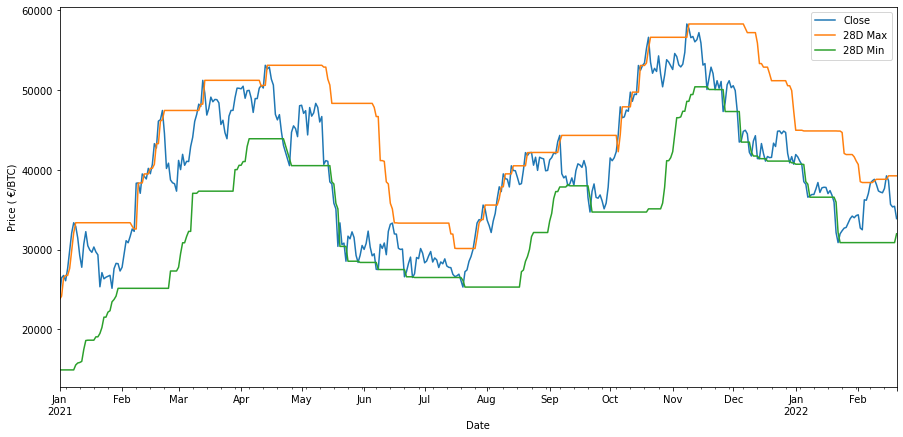

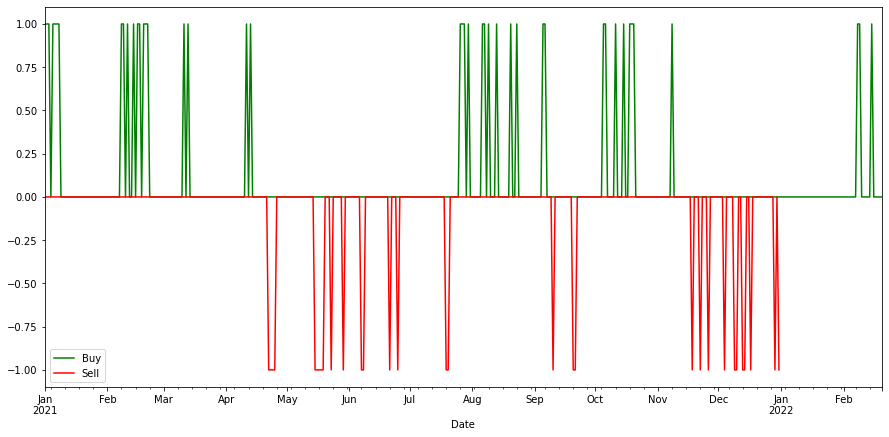

In [11]:
start, end = "2021", "2022"

data[["Close", "28D Max", "28D Min"]].loc[start:end].plot(figsize=(15, 7))
plt.ylabel("Price ( €/BTC)")
plt.show()

data["Buy"].loc[start:end].plot(figsize=(15, 7), c="green")
data["Sell"].loc[start:start].plot(figsize=(15, 7), c="red")
plt.legend()
plt.show()